In [84]:
import pandas as pd
import shutil
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
TXT_PATH = '/home/kirillk/datasets/cafe_face_recognition/test.txt'
DATA_PATH = '/home/kirillk/PycharmProjects/face-recognition-prototype/data/'
TEMP_PATH = '/home/kirillk/PycharmProjects/face-recognition-prototype/temp/'
TEST_PHOTO_FOLDER = 'test_photos/'
FILTERED_PHOTO_FOLDER = 'filtered_photo/'
GOOD_FILTERED_PHOTO_FOLDER = 'good_filtered_photo/'
FILTERED_TXT_PATH = '/home/kirillk/datasets/cafe_face_recognition/test_research.txt'

In [14]:
filename = []
track = []
bad = []
score = []
best = []

with open(TXT_PATH) as file:
    for line in file:
        line = line.rstrip()
        if '.jpg' in line:
            filename.append(line)
        elif 'track' in line:
            track.append(line.split(' ')[-1])
        elif 'bad' in line:
            bad.append(line.split(' ')[-1])
        elif 'score' in line:
            score.append(line.split(' ')[-1])
        elif 'best' in line:
            best.append(line.split(' ')[-1])

In [20]:
print(len(filename))

549


In [16]:
data = {'filename':filename, 
        'bad':bad, 
        'score':score,
        'best':best}

In [17]:
df = pd.DataFrame(data)

In [18]:
df.head(10)

,filename,bad,score,best
0,312.jpg,0,0,0
1,108.jpg,0,0,1
2,204.jpg,0,0,0
3,280.jpg,0,0,0
4,134.jpg,0,0,0
5,353.jpg,0,0,0
6,360.jpg,0,0,0
7,409.jpg,0,0,1
8,538.jpg,0,0,1
9,345.jpg,0,0,1


In [19]:
for column in df.columns:
    if column == 'filename':
        continue
    print(df[column].value_counts())

0    549
Name: bad, dtype: int64
0    549
Name: score, dtype: int64
0    404
1    145
Name: best, dtype: int64


In [21]:
filtered_df = df[df['best'] == '1']

In [22]:
filtered_df.head()

,filename,bad,score,best
1,108.jpg,0,0,1
7,409.jpg,0,0,1
8,538.jpg,0,0,1
9,345.jpg,0,0,1
13,245.jpg,0,0,1


In [29]:
for index, row in filtered_df.iterrows():
    shutil.copyfile(DATA_PATH + TEST_PHOTO_FOLDER + row['filename'], 
                    DATA_PATH + FILTERED_PHOTO_FOLDER + row['filename'])

In [50]:
print(os.listdir(TEMP_PATH))

['7', '25', '17', '10', '37', '8', '23', '20', '28', '4', '22', '30', '35', '36', '34', '1', '26', '13', '14', '6', '29', '24', '39', '2', '15', '3', '5', '11', '19', '31', '27', '33']


In [51]:
files = []
good_filtered_photos = os.listdir(DATA_PATH + GOOD_FILTERED_PHOTO_FOLDER)

In [52]:
for folder in os.listdir(TEMP_PATH):
    for file in os.listdir(TEMP_PATH + folder):
        files.append(file)

In [53]:
len(files) == len(good_filtered_photos)

True

In [72]:
filename = []
meta_data = []

with open(FILTERED_TXT_PATH) as file:
    for line in file:
        line = line.rstrip()
        if '.jpg' in line:
            filename.append(line)
        else:
            meta_data.append(line)

In [73]:
print(filename)
meta_data

['20_007.jpg', '26_065.jpg', '17_023.jpg', '39_086.jpg', '30_061.jpg', '39_031.jpg', '13_046.jpg', '39_085.jpg', '07_016.jpg', '31_001.jpg', '22_048.jpg', '15_059.jpg', '14_038.jpg', '20_070.jpg', '39_051.jpg', '25_029.jpg', '05_068.jpg', '17_082.jpg', '35_027.jpg', '33_012.jpg', '39_003.jpg', '24_024.jpg', '39_022.jpg', '02_066.jpg', '04_054.jpg', '11_092.jpg', '17_077.jpg', '02_006.jpg', '39_067.jpg', '30_060.jpg', '20_057.jpg', '07_018.jpg', '11_043.jpg', '08_034.jpg', '29_005.jpg', '02_039.jpg', '33_008.jpg', '39_055.jpg', '25_091.jpg', '10_056.jpg', '39_020.jpg', '23_081.jpg', '35_017.jpg', '07_033.jpg', '17_015.jpg', '17_071.jpg', '28_063.jpg', '08_035.jpg', '04_088.jpg', '29_050.jpg', '39_041.jpg', '39_073.jpg', '39_026.jpg', '35_011.jpg', '25_087.jpg', '02_004.jpg', '14_052.jpg', '01_037.jpg', '07_074.jpg', '04_090.jpg', '34_093.jpg', '05_019.jpg', '25_076.jpg', '35_072.jpg', '24_083.jpg', '19_053.jpg', '17_069.jpg', '31_010.jpg', '36_021.jpg', '39_040.jpg', '30_045.jpg', '26_0

['0.8229808807373047 20',
 '0.6661842465400696 26',
 '0.8823868036270142 17',
 '0.5326451063156128 39',
 '1.2549211978912354 30',
 '0.6154799461364746 39',
 '0.8699918985366821 13',
 '0.4173157811164856 39',
 '0.7489612102508545 7',
 '0.7956287860870361 31',
 '0.4809022843837738 22',
 '0.6660935878753662 15',
 '0.819983720779419 14',
 '0.744796872138977 20',
 '0.5689691305160522 39',
 '0.8290808200836182 25',
 '0.8927831649780273 5',
 '0.9570621252059937 17',
 '1.1139018535614014 37',
 '0.3678244948387146 33',
 '0.7964556217193604 39',
 '0.7815664410591125 24',
 '0.5747289657592773 39',
 '0.688244104385376 2',
 '0.5544595718383789 4',
 '0.5794292092323303 11',
 '0.7632390260696411 17',
 '0.8586607575416565 2',
 '0.818869948387146 39',
 '0.9595839977264404 30',
 '0.8333731889724731 20',
 '0.9539424180984497 8',
 '0.5554594993591309 11',
 '0.4356952905654907 8',
 '0.46198809146881104 29',
 '0.6931788921356201 2',
 '0.7948529720306396 3',
 '0.5143431425094604 39',
 '0.7101891040802002 25'

In [74]:
data = {'filename':filename, 
        'metadata':meta_data}

In [75]:
res_df = pd.DataFrame(data)

In [76]:
res_df['ground_truth'] = res_df['filename'].apply(lambda x: x.split('_')[0])
res_df['filename'] = res_df['filename'].apply(lambda x: x.split('_')[-1])
res_df['distance'] = res_df['metadata'].apply(lambda x: x.split(' ')[0])
res_df['prediction'] = res_df['metadata'].apply(lambda x: x.split(' ')[-1])

In [77]:
res_df = res_df.drop('metadata', axis=1)

In [79]:
res_df['correct'] = (res_df['ground_truth'] == res_df['prediction']).astype('int')

In [80]:
res_df.head()

,filename,ground_truth,distance,prediction,correct
0,007.jpg,20,0.8229808807373047,20,1
1,065.jpg,26,0.6661842465400696,26,1
2,023.jpg,17,0.8823868036270142,17,1
3,086.jpg,39,0.5326451063156128,39,1
4,061.jpg,30,1.2549211978912354,30,1


In [81]:
res_df['correct'].value_counts(normalize=True)

1    0.734043
0    0.265957
Name: correct, dtype: float64

In [82]:
res_df_correct = res_df[res_df['correct'] == 1]

In [83]:
res_df_correct.head()

,filename,ground_truth,distance,prediction,correct
0,007.jpg,20,0.8229808807373047,20,1
1,065.jpg,26,0.6661842465400696,26,1
2,023.jpg,17,0.8823868036270142,17,1
3,086.jpg,39,0.5326451063156128,39,1
4,061.jpg,30,1.2549211978912354,30,1


In [88]:
res_df_correct['distance'] = res_df_correct['distance'].astype('float')

/tmp/ipykernel_17662/558478653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df_correct['distance'] = res_df_correct['distance'].astype('float')


<AxesSubplot:xlabel='distance', ylabel='Density'>

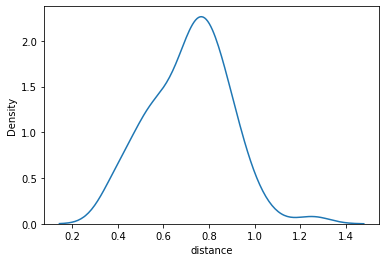

In [89]:
sns.kdeplot(res_df_correct['distance'])

In [90]:
res_df_incorrect = res_df[res_df['correct'] == 0]

In [91]:
res_df_incorrect['distance'] = res_df_incorrect['distance'].astype('float')

/tmp/ipykernel_17662/3529429156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df_incorrect['distance'] = res_df_incorrect['distance'].astype('float')


<AxesSubplot:xlabel='distance', ylabel='Density'>

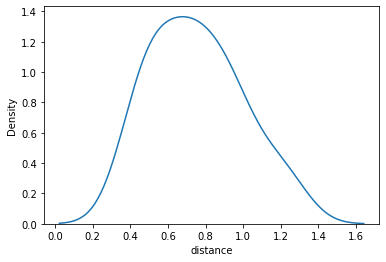

In [92]:
sns.kdeplot(res_df_incorrect['distance'])

In [2]:
df = pd.read_csv('/home/kirillk/datasets/cafe_face_recognition/face_recognition_prototype/fucking_dump_ya_ebal.csv')

In [3]:
df.head()

,employee_id,source,file
0,15635,ROSA,e1b58dae-a8cc-11ec-a789-36350c8e42fe.jpg
1,22652,ROSA,e20fb482-a8cc-11ec-a789-36350c8e42fe.jpg
2,22653,ROSA,e250814c-a8cc-11ec-a789-36350c8e42fe.jpg
3,22561,ROSA,e2aaf9a6-a8cc-11ec-a789-36350c8e42fe.jpg
4,14425,ROSA,e2f410be-a8cc-11ec-a789-36350c8e42fe.jpg


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8221 entries, 0 to 8220
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   employee_id  8221 non-null   int64 
 1   source       8221 non-null   object
 2   file         8221 non-null   object
dtypes: int64(1), object(2)
memory usage: 192.8+ KB


In [6]:
len(df)

8221

In [5]:
len(df['employee_id'].unique())

6505

### Анализ количества фото

In [11]:
emoployee_more_than_one_photo = df['employee_id'].value_counts() > 1

In [12]:
emoployee_more_than_one_photo

10800     True
22707     True
689       True
4177      True
12366     True
         ...  
11719    False
11944    False
11934    False
11931    False
16177    False
Name: employee_id, Length: 6505, dtype: bool

In [13]:
employee_photo_number = df['employee_id'].value_counts()

In [20]:
employee_with_many_photos = employee_photo_number[employee_photo_number >= 10]

In [60]:
employee_with_many_photos

10800    40
22707    34
689      26
4177     25
12366    24
12154    23
16153    22
7988     21
8565     21
17303    20
11755    19
11673    15
22097    15
5310     14
17827    13
19785    13
19868    13
20390    13
22897    12
8447     12
10989    12
3073     12
22768    12
22605    11
21395    11
12166    11
16398    11
17974    11
6701     11
17547    11
11696    11
15695    11
22490    10
1330     10
22191    10
15369    10
8281     10
8193     10
21949    10
23014    10
Name: employee_id, dtype: int64

In [22]:
employee_with_many_photos.index

Int64Index([10800, 22707,   689,  4177, 12366, 12154, 16153,  7988,  8565,
            17303, 11755, 11673, 22097,  5310, 17827, 19785, 19868, 20390,
            22897,  8447, 10989,  3073, 22768, 22605, 21395, 12166, 16398,
            17974,  6701, 17547, 11696, 15695, 22490,  1330, 22191, 15369,
             8281,  8193, 21949, 23014],
           dtype='int64')

In [25]:
len(employee_photo_number[employee_photo_number == 1])

5761

In [ ]:
data_pivot = data_final.pivot_table(index=['category_name', 'subcategory_name'], 
                                    columns='source',
                                    values='visits',
                                    aggfunc='sum')
print(data_pivot.head(10))

In [33]:
number_of_photos = df.pivot_table(index=['employee_id'], 
                                  columns='source',
                                  values='file',
                                  aggfunc='count').reset_index()

In [34]:
number_of_photos.head()

source,employee_id,BOT,CANTEEN,ROSA
0,30,NaN,NaN,1.0
1,37,NaN,NaN,1.0
2,52,NaN,NaN,2.0
3,65,NaN,NaN,1.0
4,77,NaN,NaN,1.0


In [35]:
number_of_photos[number_of_photos['ROSA'] > 1]

source,employee_id,BOT,CANTEEN,ROSA
2,52,NaN,NaN,2.0
15,193,NaN,NaN,2.0
31,254,NaN,NaN,2.0
81,619,NaN,NaN,2.0
122,1288,NaN,NaN,2.0
...,...,...,...,...
6361,23136,NaN,NaN,2.0
6374,23151,NaN,NaN,2.0
6411,23191,NaN,NaN,2.0
6437,23225,NaN,NaN,2.0


In [40]:
number_of_photos[number_of_photos['ROSA'] == 0]

source,employee_id,BOT,CANTEEN,ROSA


In [73]:
#17303

for employye in employee_with_many_photos.index:
    if 'ROSA' not in df[df['employee_id'] == employye]['source'].value_counts().index:
        employee_with_many_photos = employee_with_many_photos.drop(index=employye)
        
len(employee_with_many_photos)

39

In [76]:
more_than_one_photo_ROSA = []

for employye in employee_with_many_photos.index:
#     print(df[df['employee_id'] == employye]['source'].value_counts())
    if df[df['employee_id'] == employye]['source'].value_counts()['ROSA'] > 1:
        more_than_one_photo_ROSA.append(employye)
        
more_than_one_photo_ROSA   

[22490, 21949]

In [77]:
df[df['employee_id'] == 22490]

,employee_id,source,file
5053,22490,ROSA,2312cb2a-ad20-11ec-8ab9-cea5474ef9b7.jpg
7113,22490,CANTEEN,755d4b10-d68a-11ec-b40d-8a76ea2ba533.jpg
7227,22490,CANTEEN,50b6cc5a-d7e3-11ec-b40d-8a76ea2ba533.jpg
7293,22490,ROSA,281cfa4c-d7f4-11ec-81e1-32f6f7943c3d.jpg
7432,22490,CANTEEN,a15825a6-da4e-11ec-9a6b-8a76ea2ba533.jpg
7471,22490,CANTEEN,e998f5d8-da77-11ec-ac10-363df93e4ac1.jpg
7496,22490,CANTEEN,781531a6-db08-11ec-a843-8a76ea2ba533.jpg
7615,22490,CANTEEN,c0151736-dbd1-11ec-9b64-363df93e4ac1.jpg
8019,22490,CANTEEN,c8529958-dff7-11ec-9862-4eb8fc4b8ff7.jpg
8062,22490,CANTEEN,b332a028-e096-11ec-a07d-4eb8fc4b8ff7.jpg


In [80]:
df[df['employee_id'] == 21949]

,employee_id,source,file
129,21949,ROSA,96bfb026-a8cd-11ec-b96b-0a398d5b7c49.jpg
6938,21949,CANTEEN,5d1464b0-d506-11ec-9231-363df93e4ac1.jpg
6954,21949,ROSA,cb71262e-d532-11ec-81e1-32f6f7943c3d.jpg
7032,21949,CANTEEN,73bd8668-d5cb-11ec-9a6b-8a76ea2ba533.jpg
7129,21949,CANTEEN,b28d7340-d6a6-11ec-a843-8a76ea2ba533.jpg
7130,21949,CANTEEN,13df8eee-d6a7-11ec-9a6b-8a76ea2ba533.jpg
7317,21949,CANTEEN,2d7f07b4-d803-11ec-a843-8a76ea2ba533.jpg
7351,21949,CANTEEN,16a5c4fe-d823-11ec-9231-363df93e4ac1.jpg
7467,21949,CANTEEN,ad1ff38e-da74-11ec-a843-8a76ea2ba533.jpg
7689,21949,CANTEEN,de0476b4-dc09-11ec-a843-8a76ea2ba533.jpg


### Анализ источников

In [66]:
df['source'].value_counts()

ROSA       7014
CANTEEN    1107
BOT         100
Name: source, dtype: int64

In [67]:
df[df['employee_id'] == 10800]

,employee_id,source,file
2056,10800,ROSA,ff4129ca-a8cf-11ec-b96b-0a398d5b7c49.jpg
6712,10800,CANTEEN,cfd6b8ba-d10d-11ec-a788-7e34b2256923.jpg
6747,10800,CANTEEN,566ca112-d1b5-11ec-a645-7e34b2256923.jpg
6768,10800,CANTEEN,956e6fe8-d1cf-11ec-a645-7e34b2256923.jpg
6769,10800,CANTEEN,b11b9996-d1cf-11ec-a276-32e70010e065.jpg
6822,10800,CANTEEN,066d123e-d27b-11ec-9909-32e70010e065.jpg
6831,10800,CANTEEN,9f47fe84-d28e-11ec-b40d-8a76ea2ba533.jpg
6901,10800,CANTEEN,4457b10e-d4d2-11ec-ac10-363df93e4ac1.jpg
6928,10800,CANTEEN,ef01b350-d4ed-11ec-a843-8a76ea2ba533.jpg
6936,10800,CANTEEN,0d8f035a-d501-11ec-9a6b-8a76ea2ba533.jpg


In [71]:
PHOTO_PATH = '/home/kirillk/datasets/cafe_face_recognition/face_recognition_prototype/images/'
DATA_PATH = '/home/kirillk/PycharmProjects/face-recognition-prototype/data/photos/'
TEST_DATA_PATH = '/home/kirillk/PycharmProjects/face-recognition-prototype/data/test_photos/'

In [79]:
for index, row in df.iterrows():
    if row['employee_id'] in employee_with_many_photos.index and row['source'] == 'ROSA':
        shutil.copyfile(PHOTO_PATH + row['file'], DATA_PATH + row['file'])

In [78]:
for index, row in df.iterrows():
    if row['employee_id'] in employee_with_many_photos.index and row['source'] != 'ROSA':
        shutil.copyfile(PHOTO_PATH + row['file'], TEST_DATA_PATH + row['file'])